In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hierarchy
from sklearn.cluster import KMeans

In [2]:
# Uploading the Data Sets
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv


# TASK 1

Task 1 - We are building K-Means and Hierarchial Methods for Clustering and using External Validation metrics to evaluate.
Such as,
1. Adjusted Rand Score
2. F1-Score
3. Accuracy 

**Adjusted Rand Score** <br>

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

`ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)`

**F1-Score**<br>
The F1 score is a performance metric for classification and is calculated as the harmonic mean of precision and recall<br>

```
F1-Score = (2 x precision x recall) / (precision + recall)
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
```





**Accuracy**<br>
Accuracy can also be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation.

In [3]:
def actual_k_value(df):
  print('The dataset :')
  print(df)

  # Checking number of classes the dataset is divided
  k_value = df['Class'].nunique()
  print("\nNumber of classes the dataset is divided :",k_value)
  return k_value

In [4]:
def k_means(df, k_value, start_col, end_col):
  # Building a K-Means Clustering Model
  kmeans_1 = KMeans(n_clusters=k_value)
  kmeans_1.fit(df.iloc[:,start_col:end_col])

  return kmeans_1

In [5]:
def hierarchy_(df, k_value, start_col, end_col):
  import scipy.cluster.hierarchy as hierarchy
  # Plotting a Dendrogram
  print("Plotting a Dendrogram\n")
  plt.figure(figsize=(10, 10))

  dendrogram = hierarchy.dendrogram(hierarchy.linkage(df.iloc[:,start_col:end_col], method='ward'))

  # Building a Hierarchical Clustering Model
  hierarchy_model = AgglomerativeClustering(n_clusters=k_value, affinity='euclidean', linkage='ward')
  hierarchy_model.fit(df.iloc[:,start_col:end_col])

  return hierarchy_model

In [6]:
def External_validations(df, model_variable, model):

  # Predicted Classes from k-means
  print("Predicted Classes:\n", model_variable.labels_)

  # Actual classes from the data
  print("\nActual Classes:\n", np.array(df['Class']))

  print("\nEXTERNAL VALIDATIONS FOR "+model)
  # Confusion Matrix for the Actual and Predicted clusters
  print("\nConfusion Matrix for the Actual and Predicted clusters:\n",metrics.confusion_matrix(df['Class'], model_variable.labels_))

  # Adjusted Rand Score
  print("\nAdjusted Rand Score : ",metrics.adjusted_rand_score(df['Class'], model_variable.labels_))

  # F1 Score
  print("F1-Score : ",metrics.f1_score(df['Class'], model_variable.labels_, average = 'micro'))

  # Accuracy
  print("Accuracy : ",metrics.accuracy_score(df['Class'], model_variable.labels_))

  print("classification report\n", metrics.classification_report(df['Class'], model_variable.labels_, digits=3))

  print("Clusters Plotting - Actual Clusters Vs Model Predicted Clusters from "+model)

In [7]:
def scatter_plots(df, hueon, col1, col2, col3, title):
  sns.set(style = "darkgrid")

  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')

  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)
  ax.set_title(title)
  ax.scatter(df[col1], df[col2], df[col3], c = hueon)

  plt.show()

In [8]:
def scatter_2d(df, col1, col2, hueon, title_):
  fig, ax = plt.subplots(1,1, figsize=(15,15))
  p = sns.scatterplot(x="X1", y="X2", hue ="Class", data=df)
  p.set_title(title_)
  plt.show()

## Note

K-Means & Hierarchical clustering is "**Unsupervised Learning**" Algorithm.
So, we don't have control over how the cluster names are assigned.
<br>
When we use external metrics like accuracy, f1-score, etc to evaluate the model performance, the actual and predicted values won't match. Therefore, the metrics that are showing are not accurate and vary with every run.

# Data 1

In [9]:
# Reading the dataset
df = pd.read_csv("Data1.csv")

In [10]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
     Unnamed: 0        X1        X2        X3  Class
0             1 -0.063274  0.027734  0.022683      1
1             2 -0.000731  0.048211  0.069198      1
2             3 -0.060767 -0.009080  0.053085      1
3             4  0.013252 -0.011876  0.055324      1
4             5 -0.054508 -0.003813  0.001738      1
..          ...       ...       ...       ...    ...
207         208  0.175738 -0.053478 -2.733752      7
208         209  0.396046 -0.858377 -3.126866      7
209         210 -0.406362 -0.334541 -2.885598      7
210         211 -0.299275  0.071281 -3.642585      7
211         212 -0.506192  0.433538 -2.608597      7

[212 rows x 5 columns]

Number of classes the dataset is divided : 7


## K-Means Clustering

In [11]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [12]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

EXTERNAL VALIDATIONS FOR K-Means

Confusion Matrix for the Actual and Predicted clusters:
 [[ 0  0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

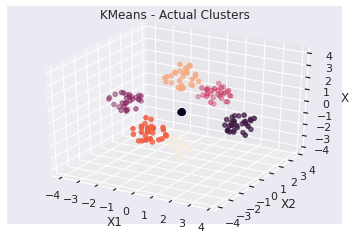

In [13]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "KMeans - Actual Clusters")

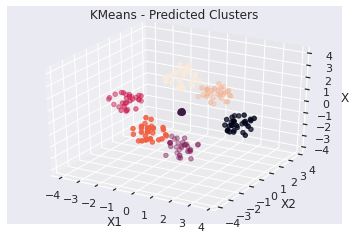

In [14]:
scatter_plots(df, kmeans_1.labels_, "X1", "X2", "X3", "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



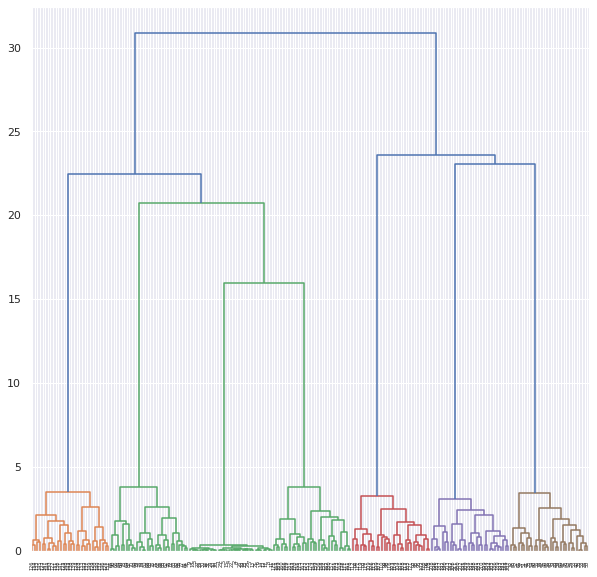

In [15]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 4)

### External Validations

In [16]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

EXTERNAL VALIDATIONS FOR Hierarchical

Confusion Matrix for the Actual and Predicted clusters:
 [[ 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

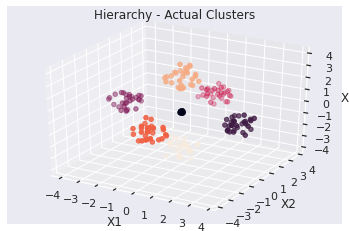

In [17]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "Hierarchy - Actual Clusters")

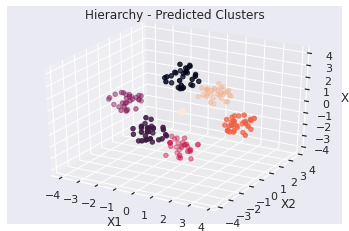

In [18]:
scatter_plots(df, hierarchy_model.labels_, "X1", "X2", "X3", "Hierarchy - Predicted Clusters")

# Data 2

In [19]:
# Reading the dataset
df = pd.read_csv("Data2.csv")

In [20]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
    Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      1
1           X2  0.387577  0.176780  0.888046      1
2           X3  0.268546  0.582963  0.080981      1
3           X4  2.031145  0.244597  0.643921      1
4           X5  0.188677  0.461280  0.496633      1
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      3
400          X  4.100000  5.100000  0.504558      4
401        X.1  3.900000  4.900000  0.941634      4
402        X.2  4.000000  5.000000  0.702123      4
403        X.3  4.100000  5.100000  0.887645      4

[404 rows x 5 columns]

Number of classes the dataset is divided : 4


## K-Means Clustering

In [21]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [22]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [3 0 0 3 0 3 3 3 3 0 0 3 3 0 0 3 0 0 0 0 0 3 0 0 0 0 3 3 3 3 3 3 0 3 3 3 0
 0 3 0 3 0 0 3 0 0 0 3 3 3 0 3 3 0 0 3 0 3 0 0 3 0 3 0 3 0 0 0 0 0 0 0 0 3
 0 3 3 0 0 0 3 0 0 0 3 3 3 0 3 0 0 3 0 0 0 3 0 0 3 3 3 3 0 3 0 3 0 0 3 3 0
 0 0 3 0 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 3 3 3 3 0 0 3 3 0 0 3
 3 0 3 3 0 0 0 0 0 3 0 0 0 0 0 3 3 0 3 3 3 0 0 3 0 0 3 0 0 3 3 0 3 3 0 3 0
 3 0 0 0 0 3 3 0 0 0 3 0 0 3 0 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2
 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0
 2 0 0 2 2 2 0 0 0 2 0 2 2 0 2 2 2 2 0 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2
 2 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

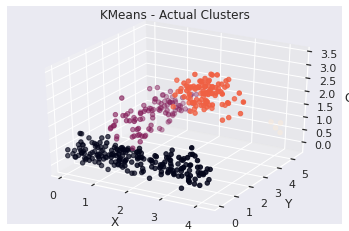

In [23]:
scatter_plots(df, df['Class'], "X", "Y", "C", "KMeans - Actual Clusters")

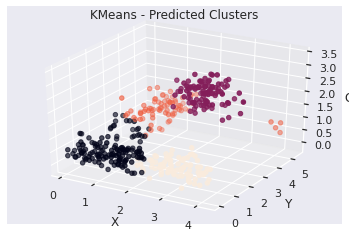

In [24]:
scatter_plots(df, kmeans_1.labels_, "X", "Y", "C", "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



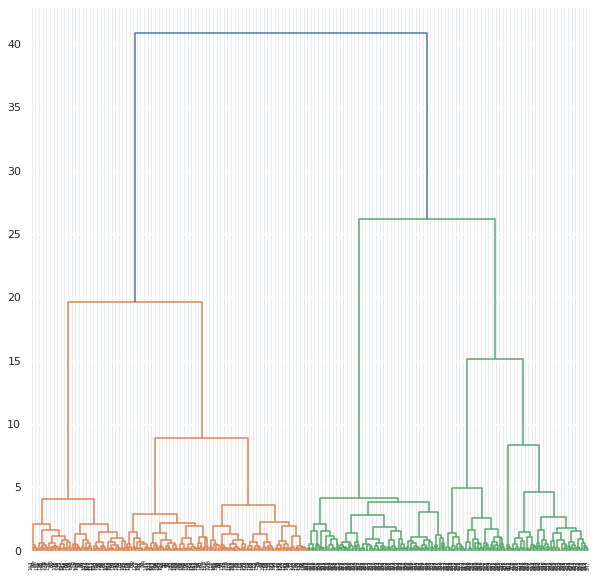

In [25]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 4)

### External Validations

In [26]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [3 1 1 1 1 3 1 3 3 1 1 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 3 3 3 3 3 1 3 1 3 1
 1 3 1 3 1 1 3 1 1 1 3 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 3
 1 3 3 1 1 1 1 1 1 1 3 3 3 1 3 1 1 3 1 1 1 3 1 1 3 3 3 1 1 3 1 3 1 1 3 3 1
 1 1 3 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 3 3 3 3 1 1 3 1 1 1 3
 3 1 1 3 1 1 1 1 1 3 1 1 1 1 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 3 3 1 3 3 1 3 1
 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

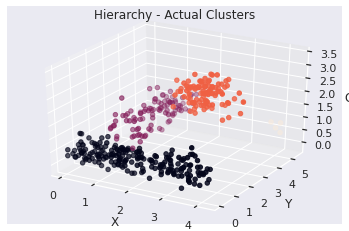

In [27]:
scatter_plots(df, df['Class'], "X", "Y", "C", "Hierarchy - Actual Clusters")

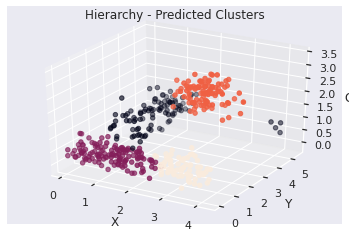

In [28]:
scatter_plots(df, hierarchy_model.labels_, "X", "Y", "C", "Hierarchy - Predicted Clusters")

# Data 3

In [29]:
# Reading the dataset
df = pd.read_csv("Data3.csv")

In [30]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
     Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      1
1             2  1.409178 -0.035191 -0.251980      1
2             3  1.096803  0.246365 -0.415011      1
3             4  1.463328  0.265354 -0.513488      1
4             5  1.603284  0.080577 -0.470257      1
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      4
396         397  0.653127 -0.703156  1.549448      4
397         398 -0.726249 -0.103244  0.694300      4
398         399  0.808596 -0.492640  1.649370      4
399         400  0.749291 -0.447840  0.863555      4

[400 rows x 5 columns]

Number of classes the dataset is divided : 4


## K-Means Clustering

In [31]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [32]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

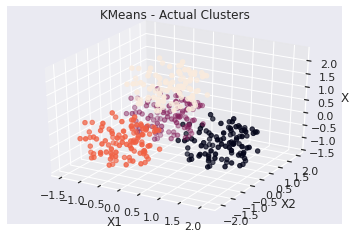

In [33]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "KMeans - Actual Clusters")

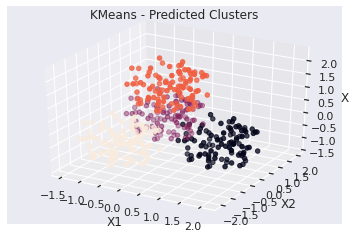

In [34]:
scatter_plots(df, kmeans_1.labels_, "X1", "X2", "X3", "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



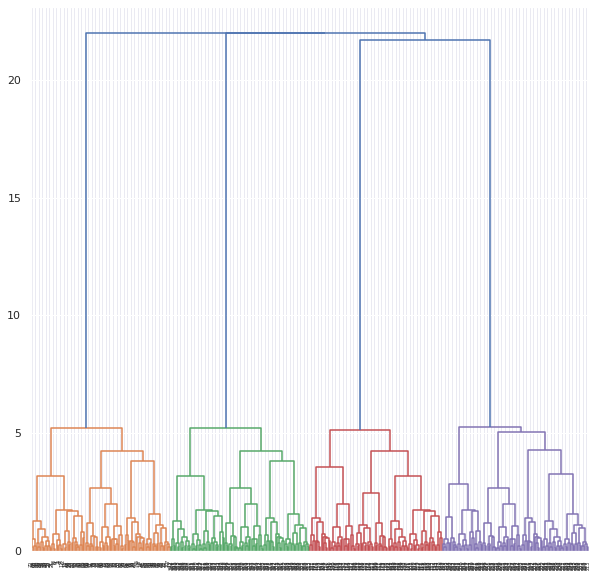

In [35]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 4)

### External Validations

In [36]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Actual Classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

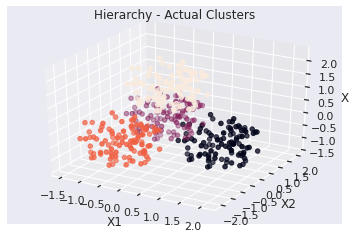

In [37]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "Hierarchy - Actual Clusters")

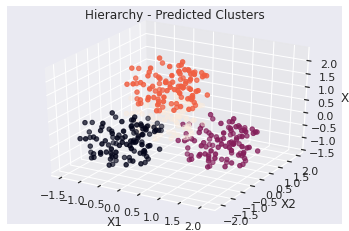

In [38]:
scatter_plots(df, hierarchy_model.labels_, "X1", "X2", "X3", "Hierarchy - Predicted Clusters")

# Data 4

In [39]:
# Reading the dataset
df = pd.read_csv("Data4.csv")

In [40]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
     Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]

Number of classes the dataset is divided : 2


## K-Means Clustering

In [41]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [42]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

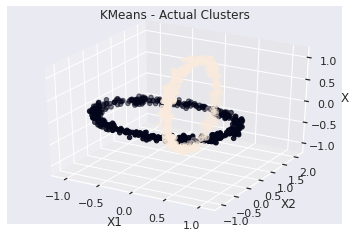

In [43]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "KMeans - Actual Clusters")

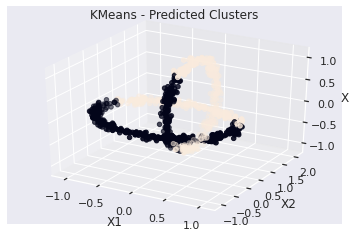

In [44]:
scatter_plots(df, kmeans_1.labels_, "X1", "X2", "X3", "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



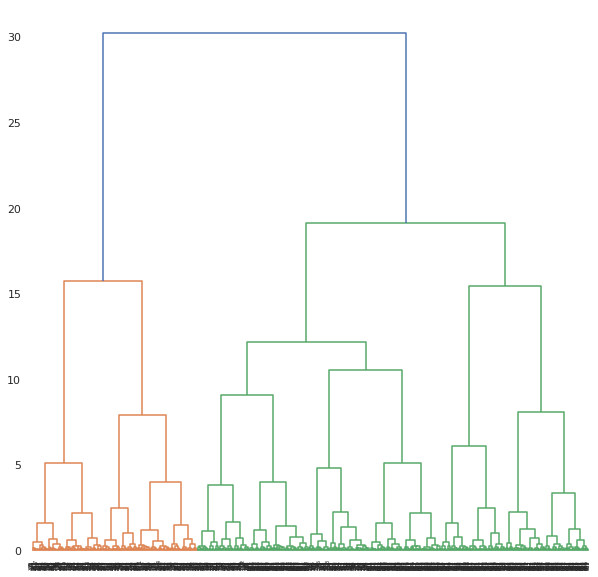

In [45]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 4)

### External Validations

In [46]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

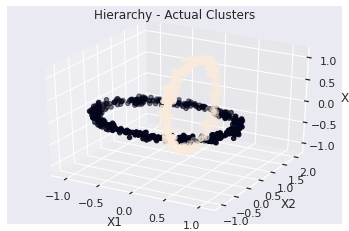

In [47]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "Hierarchy - Actual Clusters")

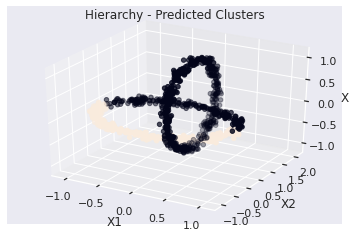

In [48]:
scatter_plots(df, hierarchy_model.labels_, "X1", "X2", "X3", "Hierarchy - Predicted Clusters")

# Data 5

In [49]:
# Reading the dataset
df = pd.read_csv("Data5.csv")

In [50]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
     Unnamed: 0         X1         X2         X3  Class
0             1  -4.822490 -50.402170   4.020861      1
1             2 -44.460120  20.964670 -11.492060      1
2             3  50.001020   0.780748   9.134460      1
3             4 -41.699080 -22.310060  16.314120      1
4             5   4.425242  -4.666664  50.223740      1
..          ...        ...        ...        ...    ...
795         796  -1.531027   0.681636   0.543271      2
796         797   0.500754  -1.848209   0.605654      2
797         798   1.089574  -0.246493  -3.355758      2
798         799  -1.907717   4.964502   2.098423      2
799         800   3.415463   4.529521  -1.617736      2

[800 rows x 5 columns]

Number of classes the dataset is divided : 2


## K-Means Clustering

In [51]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [52]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

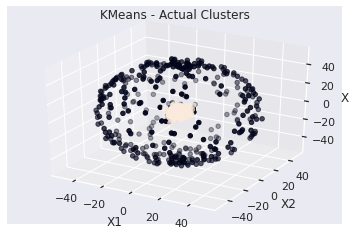

In [53]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "KMeans - Actual Clusters")

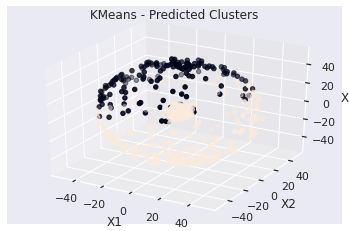

In [54]:
scatter_plots(df, kmeans_1.labels_, "X1", "X2", "X3", "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



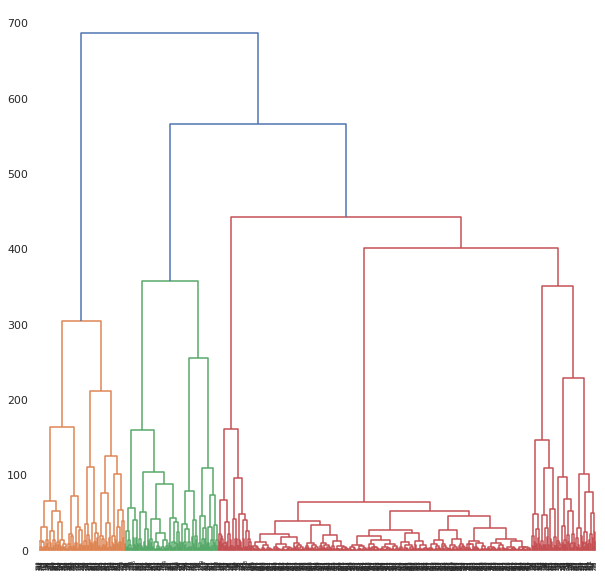

In [55]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 4)

### External Validations

In [56]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

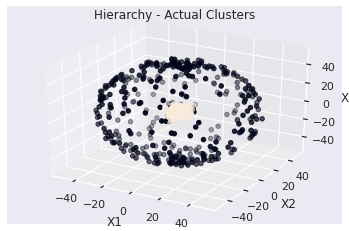

In [57]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "Hierarchy - Actual Clusters")

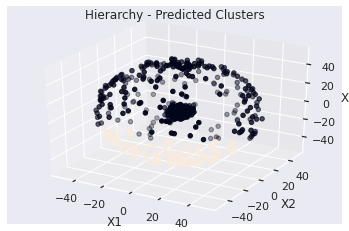

In [58]:
scatter_plots(df, hierarchy_model.labels_, "X1", "X2", "X3", "Hierarchy - Predicted Clusters")

# Data 6

In [59]:
# Reading the dataset
df = pd.read_csv("Data6.csv")

In [60]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
      Unnamed: 0        X1        X2  Class
0              1  1.388261  2.076096      1
1              2  2.177247  3.102304      1
2              3  0.378645  5.307610      1
3              4  3.681732  1.622681      1
4              5  2.462861  2.777897      1
...          ...       ...       ...    ...
4091        4092  0.909687  0.375763      2
4092        4093  2.698381  0.511262      2
4093        4094  1.078797  1.526153      2
4094        4095  1.974889 -0.649343      2
4095        4096 -0.127192 -0.763974      2

[4096 rows x 4 columns]

Number of classes the dataset is divided : 2


## K-Means Clustering

In [61]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 3)

### External Validations

In [62]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [1 1 1 ... 0 0 0]

Actual Classes:
 [1 1 1 ... 2 2 2]

EXTERNAL VALIDATIONS FOR K-Means

Confusion Matrix for the Actual and Predicted clusters:
 [[   0    0    0]
 [  46 2002    0]
 [1895  153    0]]

Adjusted Rand Score :  0.815060637690859
F1-Score :  0.48876953125
Accuracy :  0.48876953125
classification report
               precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.929     0.978     0.953      2048
           2      0.000     0.000     0.000      2048

    accuracy                          0.489      4096
   macro avg      0.310     0.326     0.318      4096
weighted avg      0.465     0.489     0.476      4096

Clusters Plotting - Actual Clusters Vs Model Predicted Clusters from K-Means


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

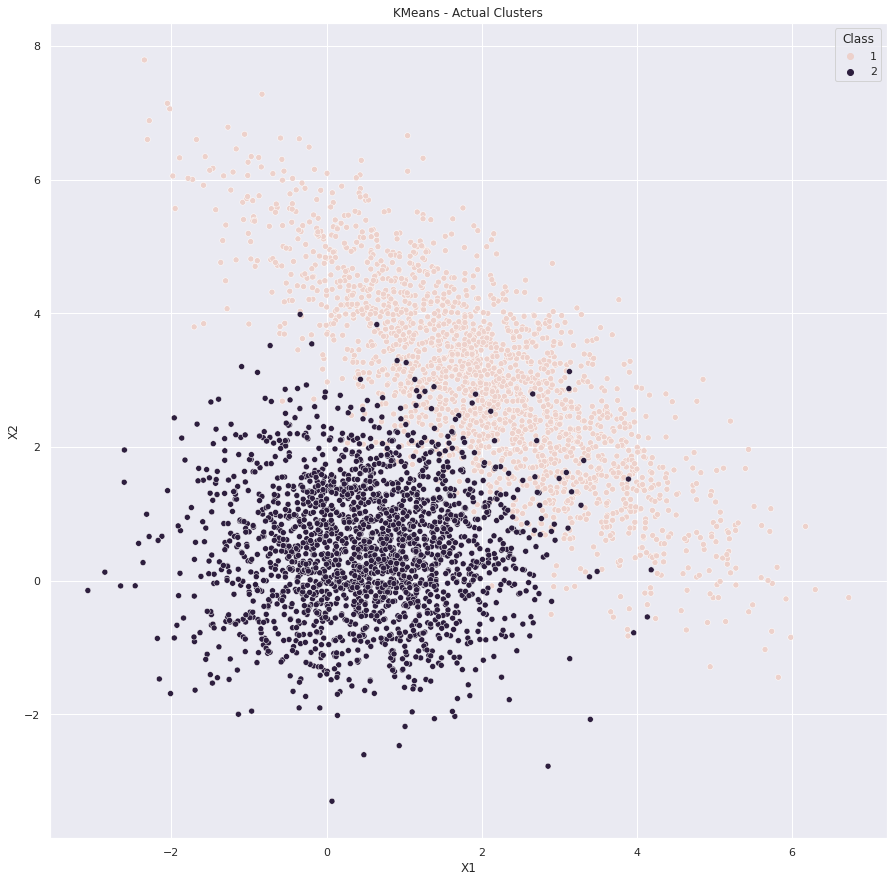

In [63]:
scatter_2d(df, "X1", "X2", "Class", "KMeans - Actual Clusters")

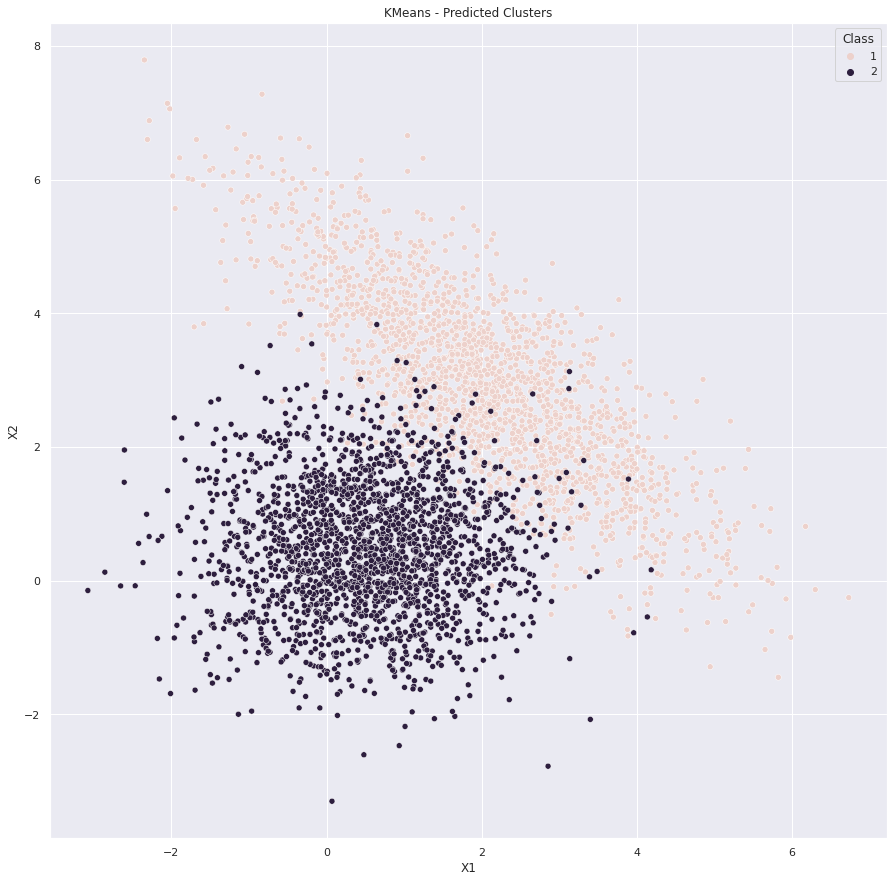

In [64]:
scatter_2d(df, "X1", "X2", kmeans_1.labels_, "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



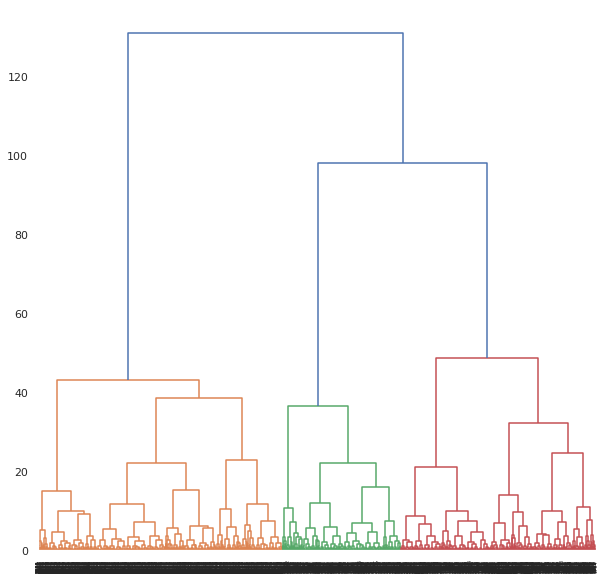

In [65]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 3)

### External Validations

In [66]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [0 0 0 ... 1 1 1]

Actual Classes:
 [1 1 1 ... 2 2 2]

EXTERNAL VALIDATIONS FOR Hierarchical

Confusion Matrix for the Actual and Predicted clusters:
 [[   0    0    0]
 [2016   32    0]
 [ 280 1768    0]]

Adjusted Rand Score :  0.7184533725930805
F1-Score :  0.0078125
Accuracy :  0.0078125
classification report
               precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.018     0.016     0.017      2048
           2      0.000     0.000     0.000      2048

    accuracy                          0.008      4096
   macro avg      0.006     0.005     0.006      4096
weighted avg      0.009     0.008     0.008      4096

Clusters Plotting - Actual Clusters Vs Model Predicted Clusters from Hierarchical


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

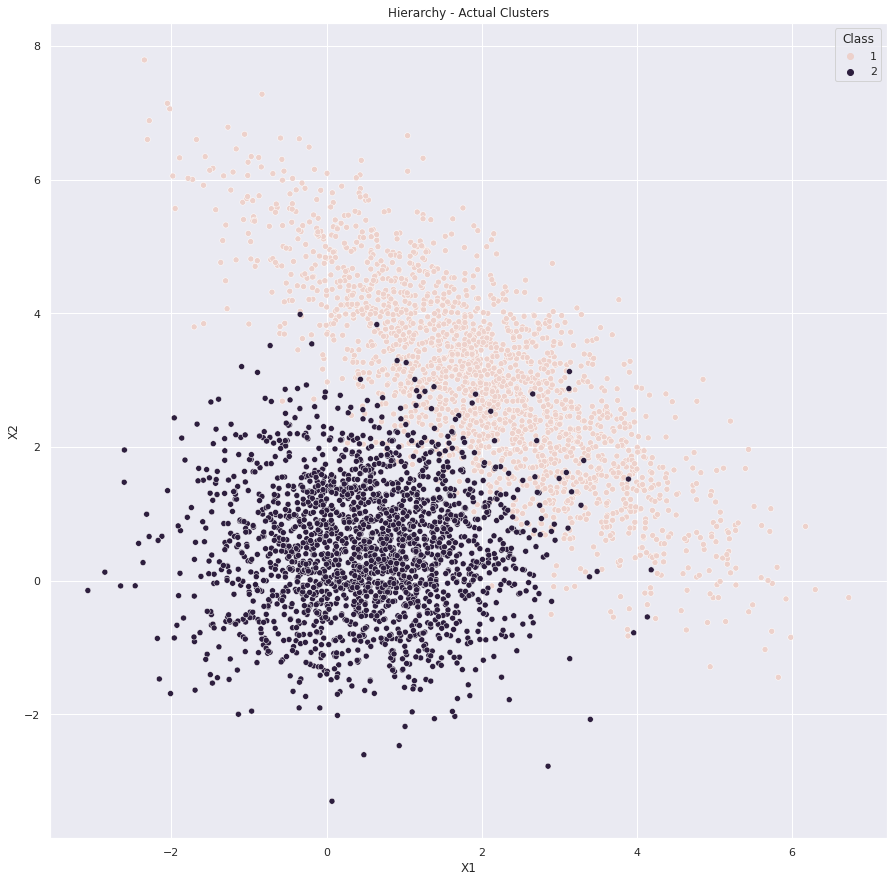

In [67]:
scatter_2d(df, "X1", "X2", "Class", "Hierarchy - Actual Clusters")

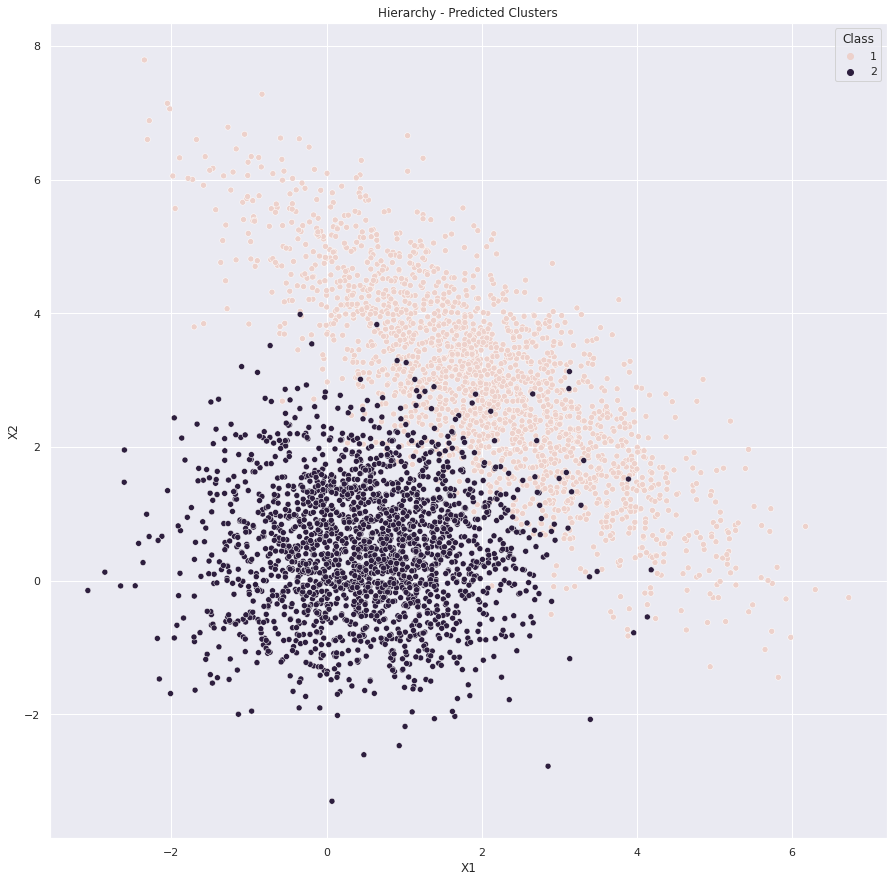

In [68]:
scatter_2d(df, "X1", "X2", hierarchy_model.labels_, "Hierarchy - Predicted Clusters")

# Data 7

In [69]:
# Reading the dataset
df = pd.read_csv("Data7.csv")

In [70]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
     Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

Number of classes the dataset is divided : 6


## K-Means Clustering

In [71]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 3)

### External Validations

In [72]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [3 0 1 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 1 5 3 0 1 1
 3 0 3 4 3 4 3 1 0 4 0 3 0 3 4 0 0 0 4 0 1 0 0 5 0 1 3 0 0 4 1 0 3 0 5 3 0
 4 3 5 3 1 4 0 5 4 5 1 5 4 0 0 5 5 4 3 1 3 1 1 5 1 0 3 5 4 4 5 1 4 5 0 0 0
 3 0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

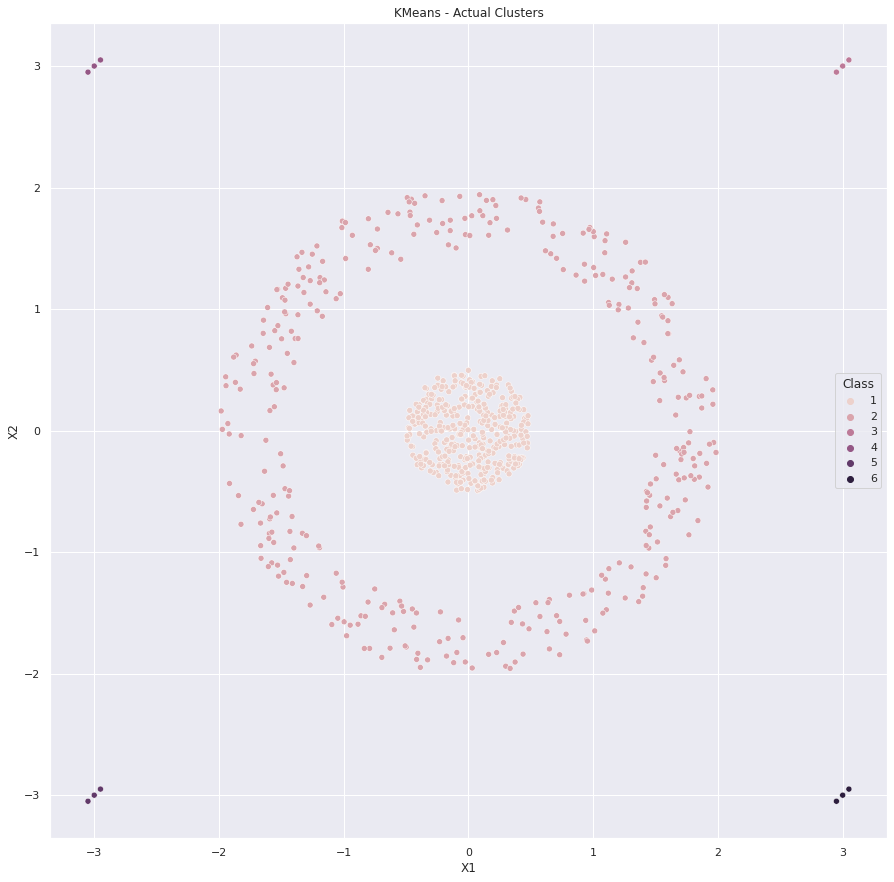

In [73]:
scatter_2d(df, "X1", "X2", "Class", "KMeans - Actual Clusters")

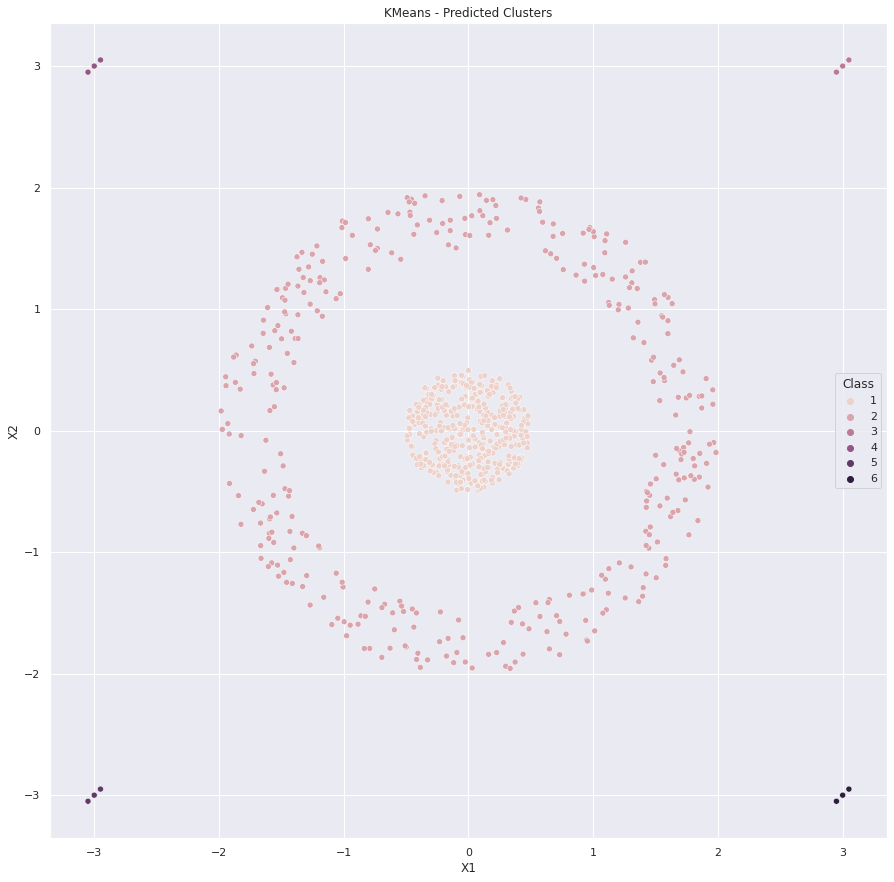

In [74]:
scatter_2d(df, "X1", "X2", kmeans_1.labels_, "KMeans - Predicted Clusters")

## Hierarchical Clustering

Plotting a Dendrogram



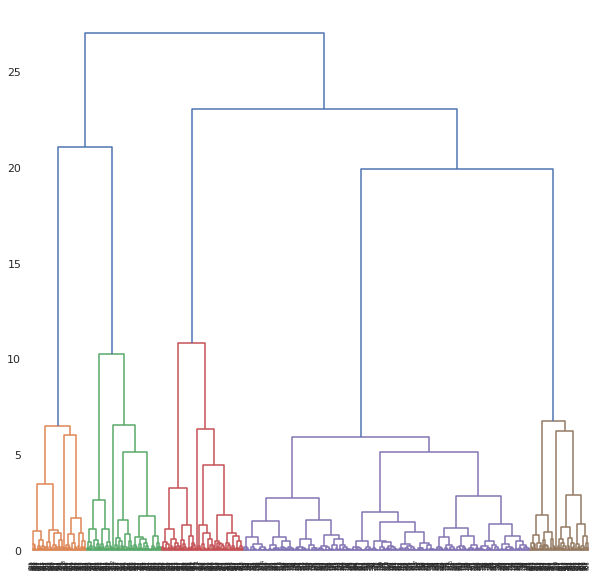

In [75]:
# Plotting a Dendrogram and building a Hierarchical Clustering Model
hierarchy_model = hierarchy_(df, k_value, 1, 3)

### External Validations

In [76]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [2 3 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 0 1 2 5 0 0
 2 3 2 0 2 0 2 0 3 0 3 2 3 2 0 3 3 5 1 3 0 3 3 1 5 0 2 3 3 0 0 3 2 3 5 2 3
 1 2 5 2 0 0 5 1 0 1 0 1 0 5 3 1 1 1 2 0 2 0 2 5 0 3 2 1 0 1 1 0 0 1 5 5 3
 2 3 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

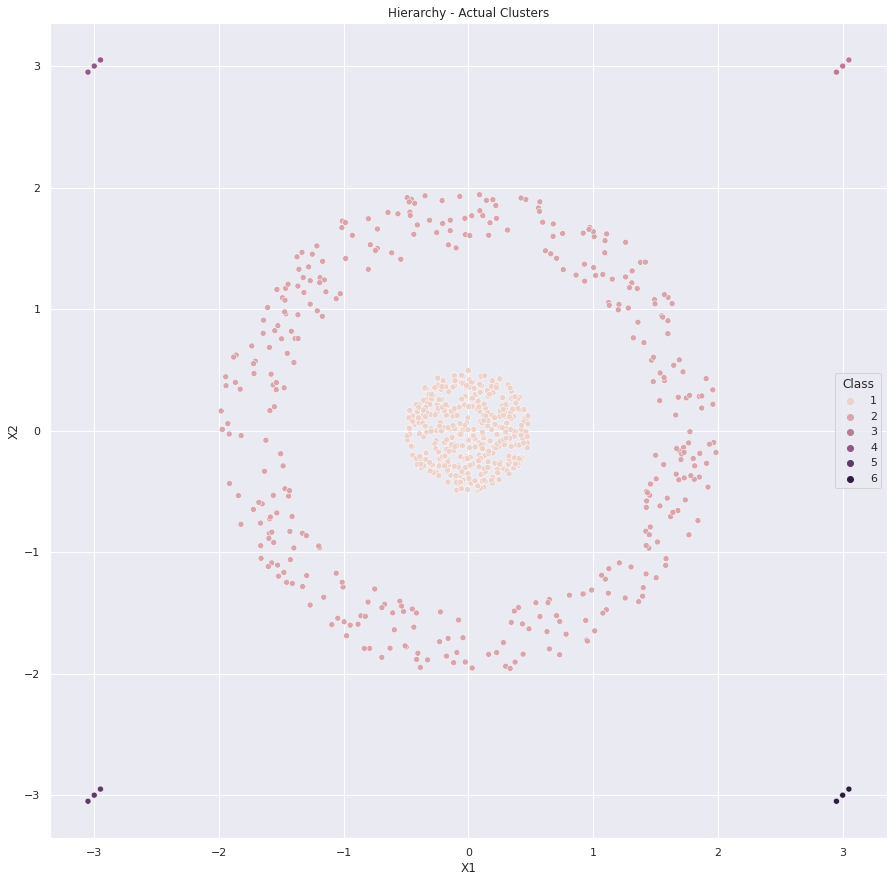

In [77]:
scatter_2d(df, "X1", "X2", "Class", "Hierarchy - Actual Clusters")

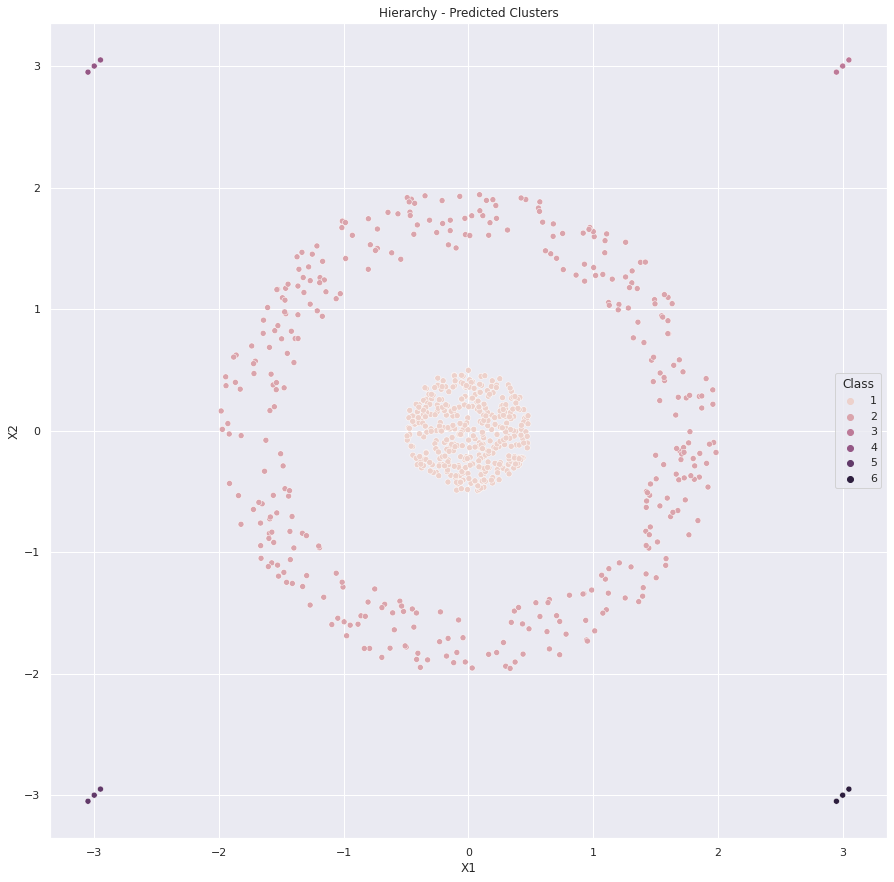

In [78]:
scatter_2d(df, "X1", "X2", hierarchy_model.labels_, "Hierarchy - Predicted Clusters")

# Data 8

In [79]:
# Reading the dataset
df = pd.read_csv("Data8.csv")

In [80]:
# Checking number of classes the dataset is divided
k_value = actual_k_value(df)

The dataset :
      Unnamed: 0        X1        X2       X3  Class
0              1  0.000000  0.000000  1.00000      1
1              2  0.000000  0.052336  0.99863      1
2              3  0.049774  0.016173  0.99863      1
3              4  0.030762 -0.042341  0.99863      1
4              5 -0.030762 -0.042341  0.99863      1
...          ...       ...       ...      ...    ...
3997        3998  0.049774 -0.016173 -0.99863      1
3998        3999  0.000000 -0.052336 -0.99863      1
3999        4000 -0.049774 -0.016173 -0.99863      1
4000        4001 -0.030762  0.042341 -0.99863      1
4001        4002  0.000000  0.000000 -1.00000      1

[4002 rows x 5 columns]

Number of classes the dataset is divided : 1


## K-Means Clustering

In [81]:
# Building a K-Means Clustering Model
kmeans_1 = k_means(df, k_value, 1, 4)

### External Validations

In [82]:
External_validations(df, kmeans_1, "K-Means")

Predicted Classes:
 [0 0 0 ... 0 0 0]

Actual Classes:
 [1 1 1 ... 1 1 1]

EXTERNAL VALIDATIONS FOR K-Means

Confusion Matrix for the Actual and Predicted clusters:
 [[   0    0]
 [4002    0]]

Adjusted Rand Score :  1.0
F1-Score :  0.0
Accuracy :  0.0
classification report
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       0.0
           1      0.000     0.000     0.000    4002.0

    accuracy                          0.000    4002.0
   macro avg      0.000     0.000     0.000    4002.0
weighted avg      0.000     0.000     0.000    4002.0

Clusters Plotting - Actual Clusters Vs Model Predicted Clusters from K-Means


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

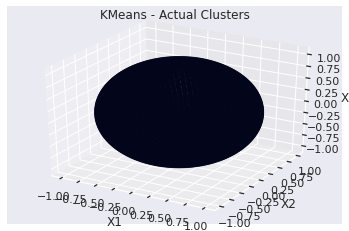

In [83]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "KMeans - Actual Clusters")

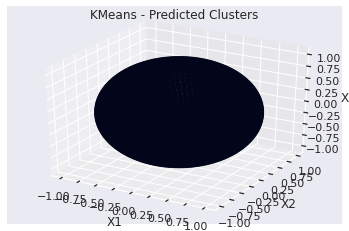

In [84]:
scatter_plots(df, kmeans_1.labels_, "X1", "X2", "X3", "KMeans - Predicted Clusters")

## Hierarchical Clustering

In [92]:
#dendrogram = hierarchy.dendrogram(hierarchy.linkage(df.iloc[:,1:4], method='single'))

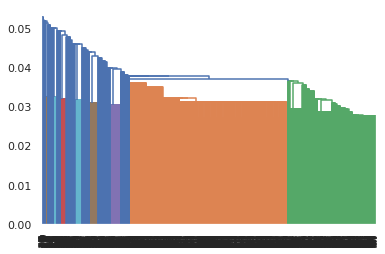

In [86]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df.iloc[:,1:3], method='ward'))

In [87]:
# Building a Hierarchical Clustering Model
hierarchy_model = AgglomerativeClustering(n_clusters=k_value, affinity='euclidean', linkage='ward')
hierarchy_model.fit(df.iloc[:,1:4])

AgglomerativeClustering(linkage='single', n_clusters=1)

### External Validations

In [88]:
External_validations(df, hierarchy_model, "Hierarchical")

Predicted Classes:
 [0 0 0 ... 0 0 0]

Actual Classes:
 [1 1 1 ... 1 1 1]

EXTERNAL VALIDATIONS FOR Hierarchical

Confusion Matrix for the Actual and Predicted clusters:
 [[   0    0]
 [4002    0]]

Adjusted Rand Score :  1.0
F1-Score :  0.0
Accuracy :  0.0
classification report
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       0.0
           1      0.000     0.000     0.000    4002.0

    accuracy                          0.000    4002.0
   macro avg      0.000     0.000     0.000    4002.0
weighted avg      0.000     0.000     0.000    4002.0

Clusters Plotting - Actual Clusters Vs Model Predicted Clusters from Hierarchical


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

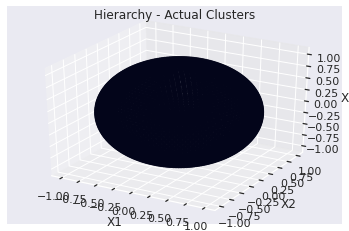

In [89]:
scatter_plots(df, df['Class'], "X1", "X2", "X3", "Hierarchy - Actual Clusters")

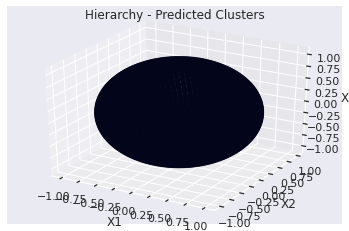

In [90]:
scatter_plots(df, hierarchy_model.labels_, "X1", "X2", "X3", "Hierarchy - Predicted Clusters")